# Overview

This week we'll get started on modern network science. We'll focus on two key results that kick-started a revolution in our understanding of networks.

* Problems with random networks as models for real networks and the Watts-Strogatz model
* Scale-free networks and the Barabasi-Albert model

Everything is divided up into 3 big chuncks. We're now up to speed, so there's a substantial amount of material today ... but I also hope that it's fun and feels worth your time :)


# Part 1: Small world networks

Once again, we'll start with some lecturing. So it's time to watch a little video to get you started.

> **_Video Lecture_**: Some properties of real world networks. Clustering and small paths. The Watts-Strogatz model. 
> 

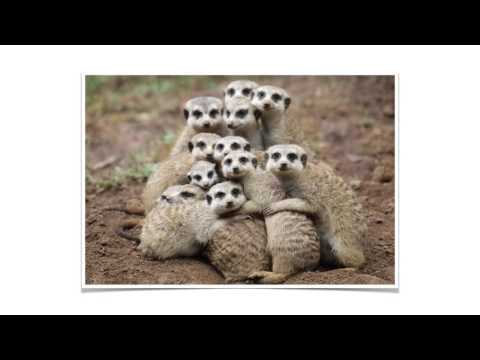

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("tMLJ2NYI1FU",width=800, height=450)

Next up is fun with reading the textbook. There's lots of goodies left in Chapter 3 that covers the stuff I've just covered in the video from a slightly different angle. 
> 
> *Reading*: For this part, we'll read the remaining part of *Network Science* Chapter 3, Section 3.5 - 3.10, with ***emphasis*** on 3.8 and 3.9\.
> 


> *Exercises*: Did you really read the text? Answer the following questions (no calculations needed) in your IPython notebook. 
> 
> * What's the problem with random networks as a model for real-world networks according to the argument in section 3.5 (near the end)?
> * List the four regimes that characterize random networks as a function of $\langle k \rangle$.
> * According to the book, why is it a problem for random networks (in terms of being a model for real-world networks) that the degree-dependent clustering $C(k)$ decreases as a function of $k$ in real-world networks?


<div class="alert alert-block alert-info">
For all of the reading questions I recommend not using a LLM. The questions are designed to make sure you actually read and understand the textbook. If you don't do it yourself, it won't stick in your human brain!
</div>

### Q1. What’s the problem with random networks as a model for real-world networks according to the argument in section 3.5 (near the end)?

Random networks predict that the clustering coefficient $C$ is simply equal to the link probability $p$, or equivalently $C = \langle k \rangle / (N-1)$. This means that as the network grows larger, clustering tends to vanish, and even in finite-size networks the level of clustering is extremely low. Real-world networks, however, show high levels of clustering because friends of friends are often connected, collaborators of collaborators often co-author, and so on. This discrepancy between theory and observation makes random networks a poor model for real networks: they cannot reproduce the significant local clustering that is a universal feature of social, biological, and technological systems.


### Q2. List the four regimes that characterize random networks as a function of $\langle k \rangle$.

When the average degree $\langle k \rangle$ is very small, specifically less than 1, the network is fragmented into many small isolated components, typically trees or chains, with no giant component. As $\langle k \rangle$ approaches the critical value of 1, a phase transition occurs and the size of the largest component begins to diverge. When $\langle k \rangle$ is greater than 1 but still relatively small, the system contains a giant component that holds a finite fraction of the nodes, while many other small clusters remain outside it. Finally, when $\langle k \rangle$ is large, the network becomes fully connected or nearly so, with almost all nodes belonging to a single giant component and paths between them being very short.


### Q3. According to the book, why is it a problem for random networks (in terms of being a model for real-world networks) that the degree-dependent clustering $C(k)$ decreases as a function of $k$ in real-world networks?

In real-world networks, the clustering coefficient is not uniform across nodes but often decreases with degree: high-degree nodes tend to connect to many low-degree nodes that are not connected among themselves, which reduces their local clustering. This degree-dependent clustering pattern, typically expressed as $C(k) \sim k^{-\alpha}$, reflects an important aspect of the hierarchical and modular structure of real networks. Random networks, by contrast, assign the same clustering probability $C = p$ to all nodes regardless of their degree, missing this heterogeneity entirely. The inability to capture degree-dependent clustering means that random networks overlook a fundamental organizing principle of complex systems and thus fail as accurate models of real-world networks.


The next set of exercises departs from the book by presenting a little study of the Watts-Strogatz (WS) model. We're going to see just how few random links the WS model needs to dramatically shorten the path-lengths in the network. And while doing that, we'll practice using `networkx`, writing loops, and plotting nice figures.

> *Exercises*: WS edition.
> 
> * First, let's use `networkx` to play around with WS graphs. Use `nx.watts_strogatz_graph` to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity $p = 0, 0.1,$ and  $1$. Calculate the average shortest path length $\langle d \rangle$ for each one. 
> * Describe what happens to the network when $p = 1$.
> * Generate a lot of networks with different values of $p$. You will notice that paths are short when $p$ is close to one and they are long when $p = 0$. What's the value of $p$ for which the average shortest path length gets close to the short paths we find in a fully randomized network.
> * Let's investigate this behavior in detail. Generate 50 networks with $N = 500$, $\langle k \rangle = 4$, for each of $p = \{0, 0.01, 0.03, 0.05, 0.1, 0.2\}$. Calculate the average of $\langle d \rangle$ as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring. Use the standard deviation to add [errorbars](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.errorbar.html) to the plot. My version of the plot is below (since a picture's worth 1000 words).
> * Imagine that you put this plot in an assignment. Write a figure caption that explains to the reader what the plot shows (which variables, etc) and what's interesting about it.

<div class="alert alert-block alert-info">
Again, I hope you will try solving the coding part of this on your own - especially the part that draws on NetworkX. The whole idea is to connect concepts from the literature to real-world code. And that learning happens when you try it on your own. I also recommend you do the loops on your own. It's OK to use LLMs to style the plot. 
</div>

![Sune's version](https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2021/main/files/ws.png)

# Q1. Generate 3 WS graphs and compute ⟨d⟩

The Watts–Strogatz (WS) model starts with a regular ring lattice (nodes connected to nearest neighbors).

Then each edge is rewired with probability 𝑝

p=0: perfectly regular lattice (long path lengths).
p=1: fully randomized (short path lengths, but clustering destroyed).

Small 𝑝: “small-world regime” — path length shrinks dramatically, but clustering remains high.

In [1]:
import networkx as nx
import numpy as np

# Parameters
N = 500
k = 4
ps = [0, 0.1, 1]

for p in ps:
    G = nx.watts_strogatz_graph(N, k, p)
    avg_path_length = nx.average_shortest_path_length(G)
    print(f"p={p}, ⟨d⟩={avg_path_length:.3f}")


p=0, ⟨d⟩=62.876
p=0.1, ⟨d⟩=7.070
p=1, ⟨d⟩=4.782


For the Watts–Strogatz networks with $N=500$ nodes and average degree $\langle k \rangle = 4$, the average shortest path length $\langle d \rangle$ was computed for three different rewiring probabilities. When $p=0$, corresponding to a regular lattice, the network has very long paths with $\langle d \rangle \approx 62.9$. When a small fraction of edges is rewired ($p=0.1$), the average path length drops sharply to $\langle d \rangle \approx 7.1$, showing the onset of the small-world property. At full randomness ($p=1$), the network resembles an Erdős–Rényi random graph, and the average path length decreases further to $\langle d \rangle \approx 4.8$. These results highlight that even a modest amount of randomness is enough to drastically shorten distances between nodes in the WS model.

# q2

When $p=1$, the Watts–Strogatz network is fully randomized. Each edge is rewired independently, and the resulting graph behaves like an Erdős–Rényi random network with $N=500$ nodes and average degree $\langle k \rangle = 4$. In this regime, the average shortest path length becomes very small, $\langle d \rangle \approx 4.8$, showing that any two nodes can be reached through only a handful of steps. However, this comes at the cost of losing the high clustering present in the original lattice. Thus, while $p=1$ networks are efficient in terms of path lengths, they do not capture the local structure typical of many real-world networks.

# Q3. Sweep over many values of p
As p increases from 0 → 1, the path length ⟨𝑑⟩ drops rapidly.

Even a tiny fraction of rewiring makes the network "small-world."

Typically, around p≈0.01–0.05, ⟨d⟩ already approaches the fully random case.

In [2]:
ps = np.logspace(-4, 0, 20)  # values from 0.0001 to 1
results = []

for p in ps:
    G = nx.watts_strogatz_graph(N, k, p)
    avg_path_length = nx.average_shortest_path_length(G)
    results.append(avg_path_length)

for p, d in zip(ps, results):
    print(f"p={p:.4f}, ⟨d⟩={d:.3f}")


p=0.0001, ⟨d⟩=62.876
p=0.0002, ⟨d⟩=62.876
p=0.0003, ⟨d⟩=62.876
p=0.0004, ⟨d⟩=62.876
p=0.0007, ⟨d⟩=54.089
p=0.0011, ⟨d⟩=46.698
p=0.0018, ⟨d⟩=53.644
p=0.0030, ⟨d⟩=35.274
p=0.0048, ⟨d⟩=25.923
p=0.0078, ⟨d⟩=25.994
p=0.0127, ⟨d⟩=21.056
p=0.0207, ⟨d⟩=14.568
p=0.0336, ⟨d⟩=12.472
p=0.0546, ⟨d⟩=9.251
p=0.0886, ⟨d⟩=8.170
p=0.1438, ⟨d⟩=6.935
p=0.2336, ⟨d⟩=5.703
p=0.3793, ⟨d⟩=5.211
p=0.6158, ⟨d⟩=4.887
p=1.0000, ⟨d⟩=4.740


For the Watts–Strogatz networks with $N=500$ and $\langle k \rangle = 4$, the average shortest path length $\langle d \rangle$ was measured across a range of rewiring probabilities $p$. When $p$ is extremely small ($p \leq 0.0004$), the network behaves like a regular lattice, with very long paths around $\langle d \rangle \approx 62.9$. As soon as $p$ increases slightly beyond $10^{-3}$, the path lengths begin to drop rapidly, reaching $\langle d \rangle \approx 35.3$ at $p=0.003$ and $\langle d \rangle \approx 25.9$ at $p=0.0048$. This sharp decrease continues, and by $p \approx 0.05$ the path length is already reduced to about $9.3$, which is close to the regime of a fully randomized network. For $p \geq 0.2$, the path length stabilizes near $\langle d \rangle \approx 5$, essentially matching the value of the $p=1$ random network.

This demonstrates the key small-world phenomenon: even a tiny fraction of rewired edges (around $p \approx 0.01$ to $0.05$) is sufficient to collapse the path length from lattice-like scales to nearly the efficiency of a random graph.

# Q4. Averaging with error bars

Because WS graphs are stochastic, we repeat the experiment for each p.

Compute mean and std of ⟨d⟩ across 50 trials.

Then plot with error bars to show how fast path length decreases.

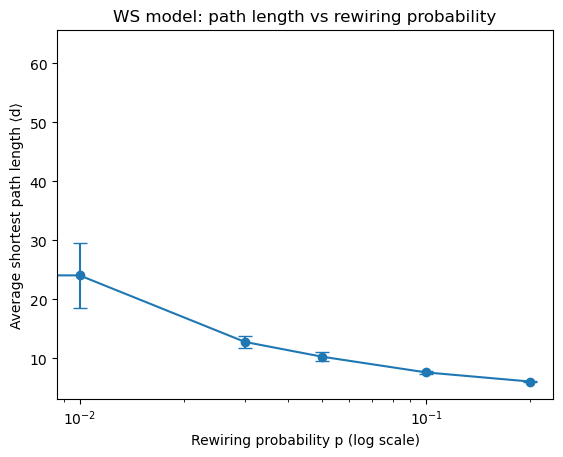

In [3]:
import matplotlib.pyplot as plt

ps = [0, 0.01, 0.03, 0.05, 0.1, 0.2]
means, stds = [], []

for p in ps:
    d_vals = []
    for _ in range(50):
        G = nx.watts_strogatz_graph(N, k, p)
        d_vals.append(nx.average_shortest_path_length(G))
    means.append(np.mean(d_vals))
    stds.append(np.std(d_vals))

# Plot
plt.errorbar(ps, means, yerr=stds, fmt='o-', capsize=5)
plt.xscale('log')
plt.xlabel("Rewiring probability p (log scale)")
plt.ylabel("Average shortest path length ⟨d⟩")
plt.title("WS model: path length vs rewiring probability")
plt.show()


Figure 1 . Average shortest path length $\langle d \rangle$ in Watts–Strogatz networks with $N=500$ and $\langle k \rangle = 4$ as a function of rewiring probability $p$. Each point shows the mean over 50 network realizations, with error bars indicating one standard deviation. The plot demonstrates that even a very small rewiring probability (around $p \approx 0.01$) is sufficient to drastically reduce the path length, collapsing it from lattice-like values to nearly the efficiency of a random network. This illustrates the small-world phenomenon: only a tiny fraction of random edges is needed to make the network globally efficient while retaining local clustering.

## Part 2: Scale-free networks

The text book uses two whole chapters on the scale free property. We'll try and power through during the remainder of this lecture. As always, let's start by getting my take on the whole thing.

> **_Video Lecture_**: The scale free property and the Barabasi-Albert Model. 
> 

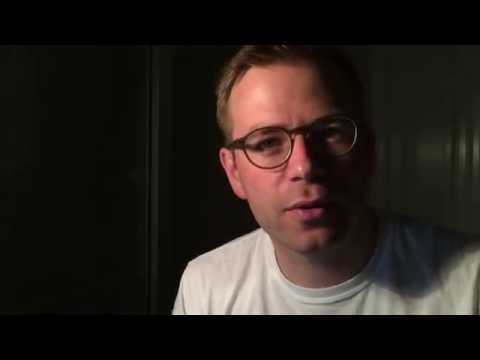

In [2]:
YouTubeVideo("myLgzbXxhOQ",width=800, height=450)

And now it's time for you guys to read. Recall that Barabasi (who wrote the textbook) discovered power-laws.

> *Reading*: Now we dig into the extended history and and theory behind Scale-Free networks and the Barabasi-Albert Model.
> 
> * Chapter 4, Section 4.1 - 4.7\.
> * Chapter 5, section 5.1 - 5.5\.
> 

> *Exercises*: BA edition.
> 
> First a couple of questions to make sure that you've actually read the text.
> 
> * What are the three slope dependent regimes of complex networks with power-law degree distributions? Briefly describe each one. (You will have to skim chp 4.7 to answer this one).

Complex networks with power-law degree distributions fall into three slope-dependent regimes based on the exponent γ. In the anomalous regime (γ ≤ 2), both the average degree and its variance diverge, and the largest hub grows as big as the network itself. This makes large-scale networks unrealistic in this regime. In the scale-free regime (2 < γ < 3), the average degree is finite but the variance diverges, meaning that hubs dominate the network. Distances scale as ln(ln N), giving the ultra-small world property. In the random-like regime (γ > 3), both the mean and variance of the degree distribution are finite, hubs are weaker, and distances scale as ln N / ln⟨k⟩, similar to Erdős–Rényi random networks.


> * What are the three regimes we find in non-linear preferential attachement? (chapter 5) Briefly describe each one.
> 

In non-linear preferential attachment, the probability of attaching to an existing node depends on its degree raised to an exponent α. When α < 1 (sub-linear), hubs are suppressed, and the degree distribution decays faster than a power law, leading to networks without strong hubs. When α = 1 (linear), the system follows the Barabási–Albert model, producing a scale-free network with a power-law degree distribution and hubs that emerge naturally. When α > 1 (super-linear), a “winner-takes-all” effect occurs, where a single node accumulates a disproportionate number of links and dominates the network, leading to a star-like topology rather than a broad scale-free distribution.

> We're going to create our own Barabasi-Albert model (a special case) in right in a `notebook`. Follow the recipe below for success:
> 
> * First create a graph consisting of a single link. (You can call the nodes anything, but I would simply use integers as names).
> * Now add another node, connecting one of the existing nodes in proportion to their degree.
> * Keep going until you have a 100 node network.
>   * *Hint*: The difficult part here is connecting to each node according to their degree. The way I do it is: generate a list of all edges (e.g. pairs of nodes), then flatten it (e.g. remove connection information). That list contains each node in proportion to its connections, thus drawing a random node from that list (e.g. using `random.choice`) corresponds to selecting a node with probability proportional to it's degree.
> * Plot the network. 
> * Add more nodes until you have a 5000 node network.
> * What's the maximum and minimum degree?
> * Now, bin the degree distribution using `numpy.histogram`.
> * Plot the distribution. Plot it with both linear and log-log axes.
> 
> ![Sune's version](https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2021/main/files/ba.png)

<div class="alert alert-block alert-info">
As above, I recommend you try this on your own. It's so cool to experience that you can actually code up a BA network on your own ... and that it's not that difficult. See if you can figure out how to do the plotting and get the bins right (*remember last week's exercise*), and as always, it's OK to ask your LLM for help with the styling. 
</div>

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random


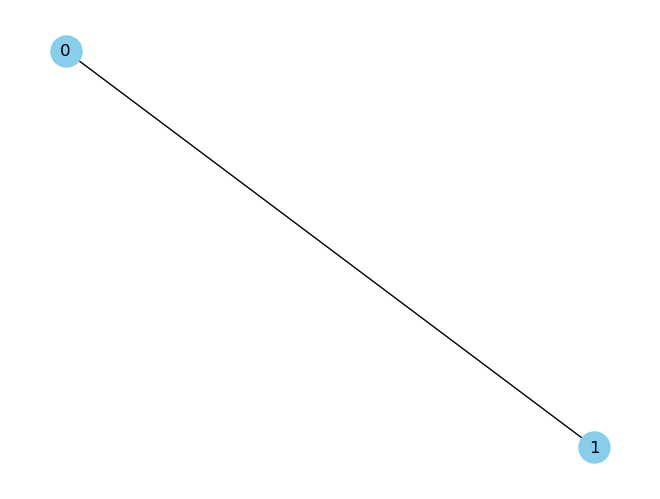

In [2]:
# Start with a graph of two connected nodes
G = nx.Graph()
G.add_edge(0, 1)

# Visualize initial graph
nx.draw(G, with_labels=True, node_color="skyblue", node_size=500)
plt.show()

In [3]:
def choose_node_by_degree(G):
    nodes = []
    for node in G.nodes():
        degree = G.degree(node)
        nodes.extend([node] * degree)  # repeat node in list according to its degree
    return random.choice(nodes)


In [4]:
num_nodes = 100

for new_node in range(2, num_nodes):  # start from 2 since 0 and 1 already exist
    target = choose_node_by_degree(G)
    G.add_edge(new_node, target)


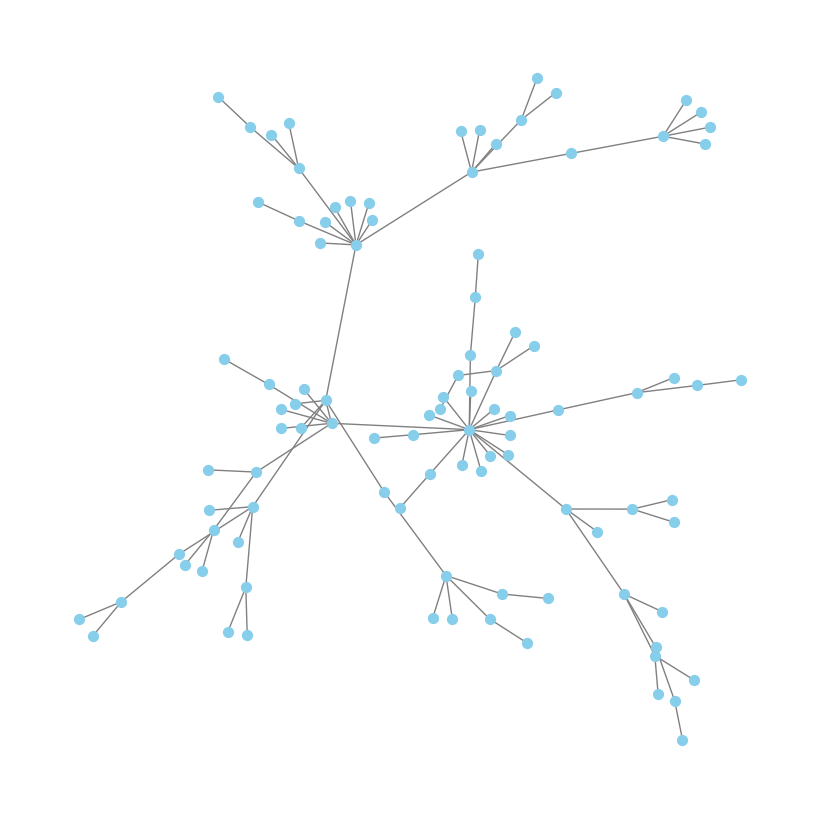

In [5]:
plt.figure(figsize=(8, 8))
pos = nx.spring_layout(G, seed=42)  # spring layout looks good for hub detection
nx.draw(G, pos, with_labels=False, 
        node_size=50, node_color="skyblue", edge_color="gray")
plt.show()


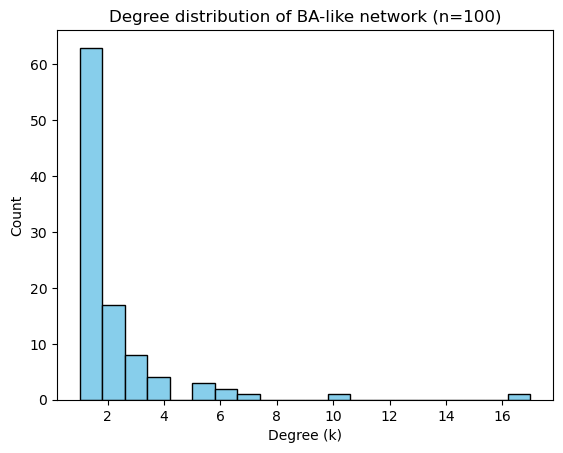

In [6]:
degrees = [G.degree(n) for n in G.nodes()]
plt.hist(degrees, bins=20, color="skyblue", edgecolor="black")
plt.xlabel("Degree (k)")
plt.ylabel("Count")
plt.title("Degree distribution of BA-like network (n=100)")
plt.show()


In [7]:
num_nodes = 5000

for new_node in range(G.number_of_nodes(), num_nodes):
    target = choose_node_by_degree(G)
    G.add_edge(new_node, target)


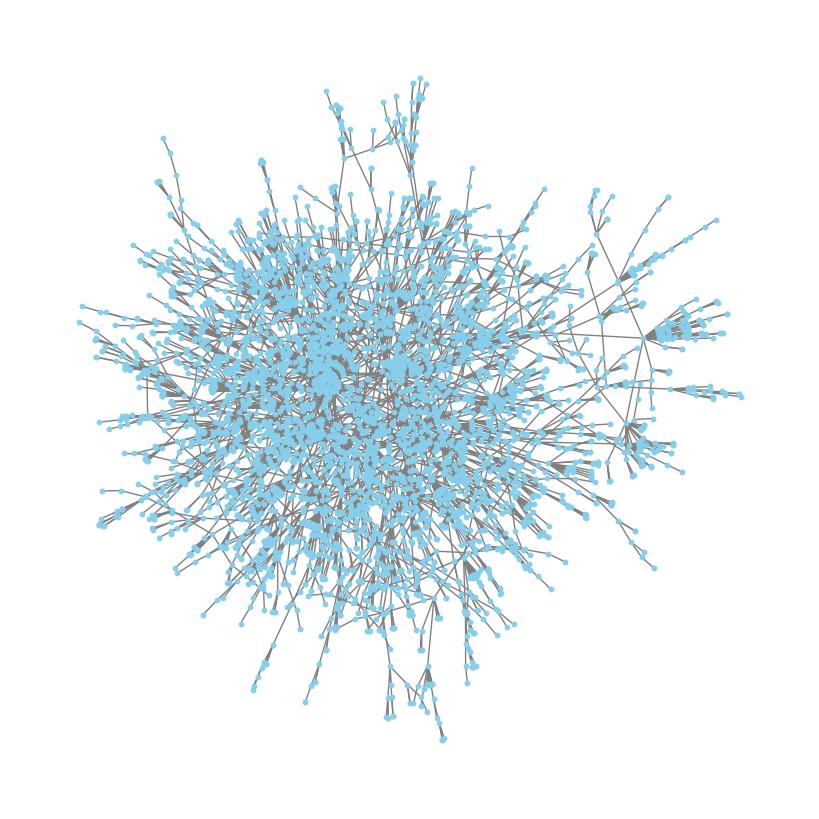

In [29]:
# visualize the larger network
plt.figure(figsize=(8, 8))
pos = nx.spring_layout(G, seed=42)  # spring layout looks good for hub detection
nx.draw(G, pos, with_labels=False, 
        node_size=10, node_color="skyblue", edge_color="gray")
plt.show()


In [8]:
degrees = [G.degree(n) for n in G.nodes()]
max_degree = max(degrees)
min_degree = min(degrees)

print("Maximum degree:", max_degree)
print("Minimum degree:", min_degree)


Maximum degree: 135
Minimum degree: 1


In [ ]:
import numpy as np

# counts, bins = np.histogram(degrees, bins=100)  # 50 bins is a good start
# print("Bins:", bins)
# print("Counts:", counts)


Bins: [  1.     2.34   3.68   5.02   6.36   7.7    9.04  10.38  11.72  13.06
  14.4   15.74  17.08  18.42  19.76  21.1   22.44  23.78  25.12  26.46
  27.8   29.14  30.48  31.82  33.16  34.5   35.84  37.18  38.52  39.86
  41.2   42.54  43.88  45.22  46.56  47.9   49.24  50.58  51.92  53.26
  54.6   55.94  57.28  58.62  59.96  61.3   62.64  63.98  65.32  66.66
  68.    69.34  70.68  72.02  73.36  74.7   76.04  77.38  78.72  80.06
  81.4   82.74  84.08  85.42  86.76  88.1   89.44  90.78  92.12  93.46
  94.8   96.14  97.48  98.82 100.16 101.5  102.84 104.18 105.52 106.86
 108.2  109.54 110.88 112.22 113.56 114.9  116.24 117.58 118.92 120.26
 121.6  122.94 124.28 125.62 126.96 128.3  129.64 130.98 132.32 133.66
 135.  ]
Counts: [4147  337  279   60   41   49   10   11   17    7    7    5    1    3
    5    1    1    3    1    1    2    0    0    3    0    1    0    2
    0    0    1    0    0    1    0    1    0    0    0    0    1    0
    0    0    0    0    0    0    0    0    0    0    

In [25]:
degree_values = [G.degree(n) for n in G.nodes()]
bins = np.arange(min(degree_values), max(degree_values) + 2) - 0.5  # bin edges for integer degrees
hist, bin_edges = np.histogram(degree_values, bins=bins)

print("Bin edges:", bin_edges)
print("Histogram counts:", hist)


Bin edges: [  0.5   1.5   2.5   3.5   4.5   5.5   6.5   7.5   8.5   9.5  10.5  11.5
  12.5  13.5  14.5  15.5  16.5  17.5  18.5  19.5  20.5  21.5  22.5  23.5
  24.5  25.5  26.5  27.5  28.5  29.5  30.5  31.5  32.5  33.5  34.5  35.5
  36.5  37.5  38.5  39.5  40.5  41.5  42.5  43.5  44.5  45.5  46.5  47.5
  48.5  49.5  50.5  51.5  52.5  53.5  54.5  55.5  56.5  57.5  58.5  59.5
  60.5  61.5  62.5  63.5  64.5  65.5  66.5  67.5  68.5  69.5  70.5  71.5
  72.5  73.5  74.5  75.5  76.5  77.5  78.5  79.5  80.5  81.5  82.5  83.5
  84.5  85.5  86.5  87.5  88.5  89.5  90.5  91.5  92.5  93.5  94.5  95.5
  96.5  97.5  98.5  99.5 100.5 101.5 102.5 103.5 104.5 105.5 106.5 107.5
 108.5 109.5 110.5 111.5 112.5 113.5 114.5 115.5 116.5 117.5 118.5 119.5
 120.5 121.5 122.5 123.5 124.5 125.5 126.5 127.5 128.5 129.5 130.5 131.5
 132.5 133.5 134.5 135.5]
Histogram counts: [3329  818  337  178  101   60   41   26   23   10   11   10    7    7
    7    3    2    1    3    4    1    1    1    1    2    1    1    1


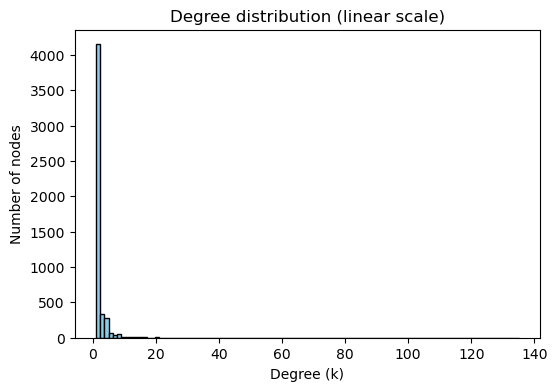

In [ ]:
# plt.figure(figsize=(6, 4))
# plt.bar(bins[:-1], counts, width=np.diff(bins), color="skyblue", edgecolor="black", align="edge")
# plt.xlabel("Degree (k)")
# plt.ylabel("Number of nodes")
# plt.title("Degree distribution (linear scale)")
# plt.show()


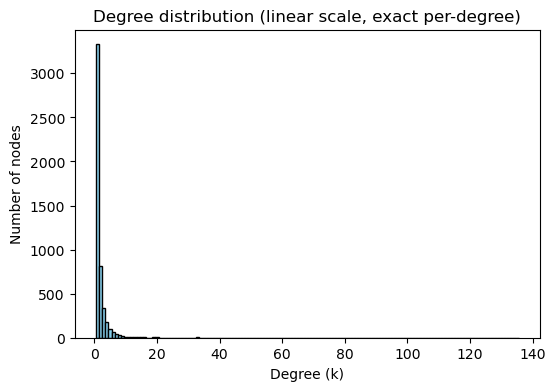

In [ ]:
plt.figure(figsize=(6, 4))
plt.bar(bin_edges[:-1] + 0.5, hist, width=1, color="skyblue", edgecolor="black", align="center")
plt.xlabel("Degree (k)")
plt.ylabel("Number of nodes")
plt.title("Degree distribution (linear scale)")
plt.show()

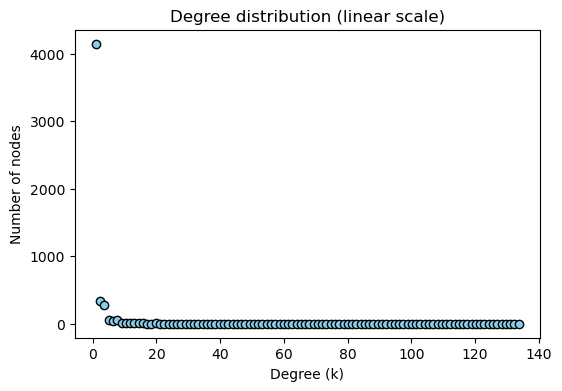

In [ ]:
# linear scale as a scatter plot
# plt.figure(figsize=(6, 4))
# plt.scatter(bins[:-1], counts, color="skyblue", edgecolor="black")
# plt.xlabel("Degree (k)")
# plt.ylabel("Number of nodes")
# plt.title("Degree distribution (linear scale)")
# plt.show()


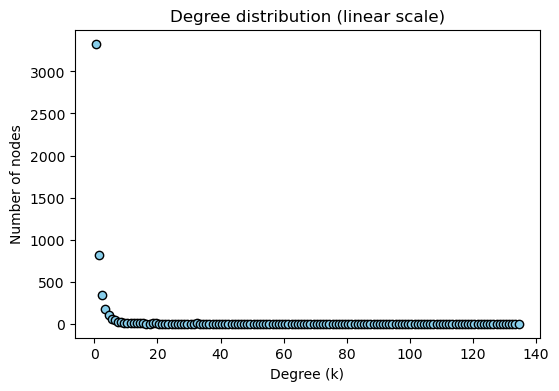

In [27]:
# linear scale as a scatter plot
plt.figure(figsize=(6, 4))
plt.scatter(bins[:-1], hist, color="skyblue", edgecolor="black")
plt.xlabel("Degree (k)")
plt.ylabel("Number of nodes")
plt.title("Degree distribution (linear scale)")
plt.show()

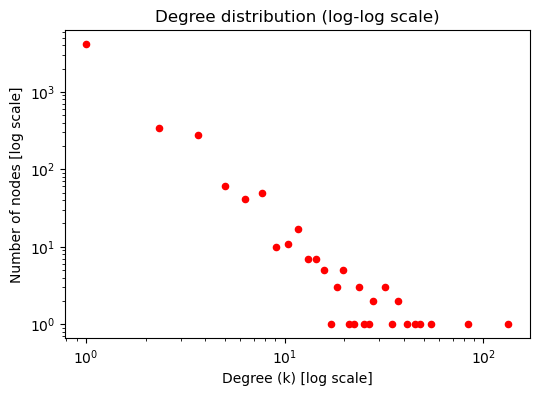

In [ ]:
# plt.figure(figsize=(6, 4))
# plt.scatter(bins[:-1], counts, color="red", s=20)
# plt.xscale("log")
# plt.yscale("log")
# plt.xlabel("Degree (k) [log scale]")
# plt.ylabel("Number of nodes [log scale]")
# plt.title("Degree distribution (log-log scale)")
# plt.show()


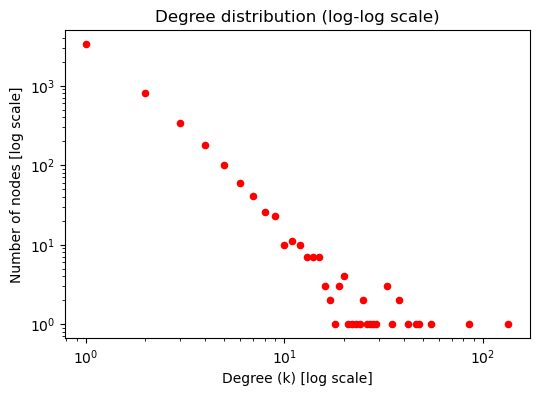

In [28]:
plt.figure(figsize=(6, 4))
plt.scatter(bin_edges[:-1] + 0.5, hist, color="red", s=20)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Degree (k) [log scale]")
plt.ylabel("Number of nodes [log scale]")
plt.title("Degree distribution (log-log scale)")
plt.show()


# Part 3: The friendship paradox in scale-free networks

Next step is to explore the [Friendship paradox](https://en.wikipedia.org/wiki/Friendship_paradox). This paradox states that _almost everyone_ has fewer friends than their friends have, on average\*. This sounds crazy, but is actually an almost trivial consequence of living in a social network with a power-law degree distribution. The explanation is that almost everyone is friends with a hub, that drives up the average degree of the friends. Let's explore that in the 5000 node BA network we've just generated (let's call this network **F-BA** for *friendship BA*). Do the following:

*Exercise*. The friendship paradox in BA networks

> * Pick a node $i$ at random (e.g. use `random.choice`). [Find its degree](https://networkx.github.io/documentation/stable/reference/classes/generated/networkx.Graph.degree.html).
> * Find $i$'s [neighbors](https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.neighbors.html). And calculate their average degree.
> * Compare the two numbers to check if it's true that $i$'s friends (on average) have more friends than $i$.
> * Do this 1000 times. How many out of those 1000 times is the friendship paradox true in **F-BA**?

*Exercise*. The friendship paradox more generally
> * What if the power law is flatter, e.g. $p(k) \sim k^{-\gamma}$ with $\gamma = 2$? Will the fraction of times the paradox is true be higher or lower? 
>  - First answer this question by simply reasoning. Think about what it would mean in terms of hubs that the power law is flatter?
>  - Now simulate a new network with the slope mentioned above. You can generate networks with power-law degree distributions using the [configuation model](https://en.wikipedia.org/wiki/Configuration_model). The `networkx` funtion is here [`nx.configuration_model`](https://networkx.org/documentation/stable/reference/generated/networkx.generators.degree_seq.configuration_model.html). I suggest you make the network pretty big ... let's say 5000 nodes or more.
>     * Hint 0: In the `networkx` function mentioned above, you need a degree sequence. This can be created using the so-called transformation method. If we can generate a random real number $r$ uniformly distributed in the range $0 \leq r < 1$, then $x = x_{\textrm{min}}(1 – r)^{-1/\alpha - 1}$ is a random power-law-distributed real number in the range $x_{\textrm{min}} \leq x < \infty$ with exponent $\alpha$. Note that there has to be a lower limit $x_\textrm{min}$ on the range; the power-law distribution diverges as $x\rightarrow 0$. See section 2 [this paper](https://www.cs.cornell.edu/courses/cs6241/2019sp/readings/Newman-2005-distributions.pdf) for more details (especially the $\ddagger$ footnote).
>     * Hint 1: The sequence generated using the method mentioned above consists of real numbers, we need integers, so it needs to be rounded as well.
>     * Hint 2: Also, due to some details of how the configuation works (see the [wiki page](https://en.wikipedia.org/wiki/Configuration_model) for details), the sequence cannot have a sum which is an odd number, so if your sequence turns out odd, just choose an element and add 1 to its degree, that way the sum will be an even number.
> - Did you reason correctly above? For what fraction of the time is the friendship paradox true for your network with a new slope?

<div class="alert alert-block alert-info">
If you want to maximize your learning, think through the questions and code up the exercise above on your own. Again, it's empowering to realize that you can actually do it. I encourage you, however, to ask your LLM to explain the configuration model to you (might be more fun that reading the Wiki page).
</div>

*Exercise*. The friendship paradox and the configuration model
> - Now generate a network for the configuration model that has *the same slope and number of nodes as **F-BA** in A above*; let's call this new network **F-CM** (for *friendship configuration model*). 
>    - What fraction of the time is the friendship paradox is true for the **F-CM** network?
>    - Assuming that **F-BA** and **F-CM** have the same degree sequence can now *think* about if **F-BA** and **F-CM** are different with respect to the friendship paradox. Specifically, please explain your thoughts on the following topics
>       * Are there factors beyond the degree-distribution that could impact how frequently the friendship paradox is true? I might consider how network properties like assortativity, clustering, community-structure, etc potentially could impact things (it's OK to search online and add references to your answer).
>       * How would you test more rigorously if the friendship-paradox is actually true equally often in **F-BA** and **F-CM**? (E.g. how would you run a statistical test to investigate ... or how would you put error-bars on your plots?)


<div class="alert alert-block alert-info">
This second part of the exercise is asking you to think about differences between two models for random networks. For this one, an appealing option could be to use an LLM to help quickly create the networks two and then analyze them using networkx. That way you can check your thinking.   
</div>
<div class="alert alert-block alert-info">
Don't use an LLM for the two last questions "Are there factors ..." and "How would you test ..." Use your brain, do some research and write down your own answer before consulting an LLM.
</div>


# Exercise 1 on friendship paradox

In [30]:
# Pick a random node
i = random.choice(list(G.nodes()))

# Degree of the chosen node
degree_i = G.degree(i)

# Degrees of its neighbors
neighbor_degrees = [G.degree(n) for n in G.neighbors(i)]

# Average degree of neighbors
avg_neighbor_degree = sum(neighbor_degrees) / len(neighbor_degrees)

print(f"Node {i} has degree: {degree_i}")
print(f"Average degree of its neighbors: {avg_neighbor_degree:.2f}")


Node 4523 has degree: 1
Average degree of its neighbors: 2.00


In [31]:
trials = 1000
paradox_true = 0

for _ in range(trials):
    i = random.choice(list(G.nodes()))
    degree_i = G.degree(i)
    neighbor_degrees = [G.degree(n) for n in G.neighbors(i)]
    
    # Avoid division by zero (if a node has no neighbors, skip it)
    if len(neighbor_degrees) == 0:
        continue
    
    avg_neighbor_degree = sum(neighbor_degrees) / len(neighbor_degrees)
    
    if avg_neighbor_degree > degree_i:
        paradox_true += 1

print(f"Out of {trials} trials, paradox was true {paradox_true} times")
print(f"Percentage: {paradox_true / trials * 100:.2f}%")


Out of 1000 trials, paradox was true 869 times
Percentage: 86.90%


The results clearly demonstrate the friendship paradox in the Barabási–Albert (F-BA) network. For example, a randomly chosen node (4523) had only one connection, while its single neighbor had degree 2 on average, already showing the paradox in action. Repeating the experiment 1000 times, the paradox held true in 869 cases (86.9%). This confirms that in a scale-free network, most nodes are connected to hubs or relatively better-connected nodes, which skews the neighbor average upward. Consequently, the majority of nodes perceive their friends as having more friends than they do, making the paradox a natural outcome of the heavy-tailed degree distribution.

# Exercise 2 on friendship paradox

A flatter power law (γ smaller, e.g. γ = 2 instead of γ = 3) means the tail is heavier. That implies more hubs (nodes with very high degree). Since the friendship paradox is driven by the presence of hubs (your friends are often hubs, so their degree skews the average), a flatter distribution should make the paradox more frequent.
So: we expect the fraction of times the paradox holds to be higher for γ = 2 than for γ = 3 (the BA case we tested before).

## Generate a Power-Law Degree Sequence

We need a power-law degree distribution with exponent $\gamma = 2$.
We'll use the **transformation method** to sample from a power-law.


## Formula (Transformation Method)

The formula to sample a degree $k$ from a power-law distribution is:

$$k = k_{\min} \cdot (1 - r)^{-1 / (\gamma - 1)}$$

### Parameters

* **$r$**: A random variable sampled from a **Uniform distribution** $\text{Uniform}(0,1)$.
* **$\gamma$**: The power-law exponent, set to $\gamma = 2$.
* **$k_{\min}$**: The minimum degree, set to $k_{\min} = 1$.


### Substitution with $\gamma=2$ and $k_{\min}=1$

Substituting the values into the formula:

$$k = 1 \cdot (1 - r)^{-1 / (2 - 1)}$$
$$k = (1 - r)^{-1}$$

This simplified formula will be used to generate the degree sequence.

In [32]:
def generate_powerlaw_degrees(n, gamma=2, k_min=1):
    r = np.random.rand(n)  # n random numbers in [0,1)
    degrees = k_min * (1 - r) ** (-1 / (gamma - 1))  
    degrees = np.round(degrees).astype(int)  # round to integers
    
    # Ensure no zeros (since k_min=1 anyway)
    degrees[degrees < 1] = 1
    
    # Ensure the sum of degrees is even (required for configuration model)
    if degrees.sum() % 2 != 0:
        degrees[0] += 1
    
    return list(degrees)

# Generate sequence for 5000 nodes with gamma=2
degree_sequence = generate_powerlaw_degrees(5000, gamma=2, k_min=1)

print("Example degrees:", degree_sequence[:10])
print("Sum of degrees (must be even):", sum(degree_sequence))

Example degrees: [np.int64(2), np.int64(1), np.int64(22), np.int64(2), np.int64(2), np.int64(3), np.int64(1), np.int64(1), np.int64(10), np.int64(1)]
Sum of degrees (must be even): 42602


In [33]:
G_plaw = nx.configuration_model(degree_sequence)
G_plaw = nx.Graph(G_plaw)  # remove parallel edges, keep as simple graph
G_plaw.remove_edges_from(nx.selfloop_edges(G_plaw))  # remove self-loops

print("Nodes:", G_plaw.number_of_nodes())
print("Edges:", G_plaw.number_of_edges())


Nodes: 5000
Edges: 15880


In [34]:
trials = 1000
paradox_true = 0

for _ in range(trials):
    i = random.choice(list(G_plaw.nodes()))
    degree_i = G_plaw.degree(i)
    neighbor_degrees = [G_plaw.degree(n) for n in G_plaw.neighbors(i)]
    
    if len(neighbor_degrees) == 0:
        continue
    
    avg_neighbor_degree = sum(neighbor_degrees) / len(neighbor_degrees)
    
    if avg_neighbor_degree > degree_i:
        paradox_true += 1

print(f"Out of {trials} trials, paradox was true {paradox_true} times")
print(f"Percentage: {paradox_true / trials * 100:.2f}%")


Out of 1000 trials, paradox was true 981 times
Percentage: 98.10%


The experiment with a power-law network of slope γ = 2 confirms that a flatter distribution strengthens the friendship paradox. In this configuration-model network with 5000 nodes, the paradox was true in 981 out of 1000 trials (98.1%), compared to 86.9% in the Barabási–Albert case (γ ≈ 3). This dramatic increase occurs because a smaller γ produces a heavier tail in the degree distribution, resulting in more extremely high-degree hubs. These hubs skew the average neighbor degree upward, making it overwhelmingly likely that a random node’s neighbors have more connections than the node itself. Thus, the paradox not only holds but becomes almost universal when the degree distribution is very flat.

# Exercise 3 on friendship paradox

F-BA = the 5000-node Barabási–Albert network we built earlier (γ ≈ 3).

F-CM = a configuration model network with the same degree sequence as F-BA.

This ensures that F-CM has the same degree distribution as F-BA, but edges are wired randomly (no preferential attachment growth).

So we’re comparing two networks with identical degree sequences but different structure.

In [35]:
# Extract degree sequence from F-BA network (G)
degree_sequence_ba = [G.degree(n) for n in G.nodes()]
print("Length of degree sequence:", len(degree_sequence_ba))
print("Sum of degrees:", sum(degree_sequence_ba))


Length of degree sequence: 5000
Sum of degrees: 9998


In [36]:
G_cm = nx.configuration_model(degree_sequence_ba)
G_cm = nx.Graph(G_cm)  # remove parallel edges
G_cm.remove_edges_from(nx.selfloop_edges(G_cm))  # remove self-loops

print("Nodes in F-CM:", G_cm.number_of_nodes())
print("Edges in F-CM:", G_cm.number_of_edges())


Nodes in F-CM: 5000
Edges in F-CM: 4981


In [37]:
trials = 1000
paradox_true = 0

for _ in range(trials):
    i = random.choice(list(G_cm.nodes()))
    degree_i = G_cm.degree(i)
    neighbor_degrees = [G_cm.degree(n) for n in G_cm.neighbors(i)]
    
    if len(neighbor_degrees) == 0:
        continue
    
    avg_neighbor_degree = sum(neighbor_degrees) / len(neighbor_degrees)
    
    if avg_neighbor_degree > degree_i:
        paradox_true += 1

print(f"Out of {trials} trials, paradox was true {paradox_true} times")
print(f"Percentage: {paradox_true / trials * 100:.2f}%")


Out of 1000 trials, paradox was true 659 times
Percentage: 65.90%


The comparison between F-BA and F-CM networks highlights that the friendship paradox depends on more than just the degree distribution. While the two networks share the same degree sequence, the paradox was true in 86.9% of trials in F-BA but only 65.9% of trials in F-CM. This difference arises because F-BA’s preferential attachment process favors connections between low-degree nodes and hubs, amplifying the paradox. In contrast, the random wiring in F-CM allows hubs to connect with each other, reducing the relative advantage of neighbors over individual nodes. These results demonstrate that network structure — such as assortativity and hub connectivity patterns — plays a critical role in shaping how strongly the friendship paradox manifests.

# exercise 4 on friendship paradox - conceptual questions:

Think about factors beyond degree distribution (e.g. assortativity, clustering, community structure).

While the degree distribution is the primary driver of the friendship paradox, other structural properties of a network can influence how frequently it occurs. For instance, assortativity (the tendency of nodes to connect to others with similar degree) can alter the effect: in a disassortative network, low-degree nodes often attach to hubs, which strengthens the paradox, while assortative mixing can weaken it by grouping similar-degree nodes together. Clustering is another important factor: if neighbors of a node are also neighbors with each other, their degree values may be less diverse, potentially reducing the paradox. Community structure may also matter, since nodes embedded in tightly-knit groups might not connect to hubs as often, leading to weaker paradox outcomes. These factors demonstrate that the paradox is not solely determined by degree distribution, but also by how the network’s links are organized.

Think about how to test rigorously (statistical testing, error bars, bootstrapping).

To test whether the friendship paradox is equally frequent in F-BA and F-CM, a more rigorous approach is needed than simply reporting averages from 1000 trials. One option would be to repeat the random sampling many times (e.g. 20–50 independent runs of 1000 samples each) and then calculate the mean and variance of the paradox frequency for both networks. Error bars or confidence intervals could then be plotted to show the reliability of the results. Alternatively, statistical hypothesis testing (e.g. a two-sample t-test or permutation test) could be applied to check whether the observed difference between F-BA and F-CM is statistically significant. Bootstrapping methods could also be used to estimate the distribution of paradox frequencies without assuming normality. These techniques would provide stronger evidence about whether the two models truly differ in how the friendship paradox manifests.

*Exercise*: Growth without preferential attachment

> Finally, we'll build a network of same size and degree as in the exercise above, *using the growth mechanism without the preferential attachment*. Follow the steps below for success
> 
>  1. Grow a new network (the Sune-network) with the same parameters as the **F-BA** network in the exercise above, i.e. 5000 nodes, each new node connects to the existing network, but with one key difference: *have the incoming nodes connect to the existing nodes with* **equal probability**. This is the Sune-network.
>  2. Generate an ER network of same number of nodes and links as the Sune-network. 
> * What are the differences between the ER network and the Sune-network? Explain in your own words. 
>   * *Hints*: To get started, plot the two degree distribution in the same plot. Compare and contrast. Another revealing network property to study is the the number of connected components.

<div class="alert alert-block alert-info">
Feel free to go nuts in asking an LLM to help you for this last exercise.
</div>

Build the Sune-network

Like the BA model, we’ll grow the network node by node.

But instead of choosing neighbors proportional to degree, we choose existing nodes uniformly at random.

Parameters: 5000 nodes, 1 edge per new node (same as F-BA)

In [38]:
# Initialize with one edge between 2 nodes
G_sune = nx.Graph()
G_sune.add_edge(0, 1)

num_nodes = 5000

for new_node in range(2, num_nodes):
    target = random.choice(list(G_sune.nodes()))  # uniform random choice
    G_sune.add_edge(new_node, target)

print("Sune-network: nodes =", G_sune.number_of_nodes(), 
      ", edges =", G_sune.number_of_edges())


Sune-network: nodes = 5000 , edges = 4999


ER should have the same number of nodes and edges as the Sune-network.

In [39]:
n = G_sune.number_of_nodes()
m = G_sune.number_of_edges()
p = (2 * m) / (n * (n - 1))  # probability to achieve roughly same number of edges

G_er = nx.erdos_renyi_graph(n, p)

print("ER network: nodes =", G_er.number_of_nodes(), 
      ", edges =", G_er.number_of_edges())


ER network: nodes = 5000 , edges = 4985


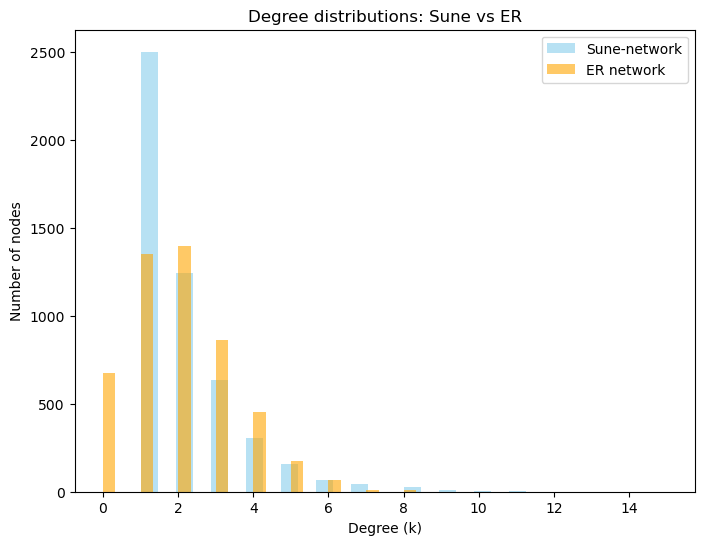

In [40]:
deg_sune = [G_sune.degree(n) for n in G_sune.nodes()]
deg_er = [G_er.degree(n) for n in G_er.nodes()]

plt.figure(figsize=(8, 6))
plt.hist(deg_sune, bins=30, alpha=0.6, label="Sune-network", color="skyblue")
plt.hist(deg_er, bins=30, alpha=0.6, label="ER network", color="orange")
plt.xlabel("Degree (k)")
plt.ylabel("Number of nodes")
plt.title("Degree distributions: Sune vs ER")
plt.legend()
plt.show()


In [41]:
cc_sune = nx.number_connected_components(G_sune)
cc_er = nx.number_connected_components(G_er)

print("Sune-network connected components:", cc_sune)
print("ER network connected components:", cc_er)


Sune-network connected components: 1
ER network connected components: 797


The comparison between the Sune-network and the ER network reveals important structural differences despite both having the same number of nodes and a similar number of edges. The degree distributions show that both networks lack hubs, with most nodes having very few links, in stark contrast to the heavy-tailed distribution of a BA network. However, the connectivity patterns differ sharply: the Sune-network forms a single connected component, while the ER network fragments into hundreds of disconnected components (797 in this case). This occurs because in the Sune-network every new node is guaranteed to attach to the growing structure, ensuring global connectivity, whereas in the ER model links are placed independently and randomly, leading to many isolated nodes and small clusters. Thus, while both networks look superficially similar in terms of degree distribution, their generative processes produce radically different connectivity properties.

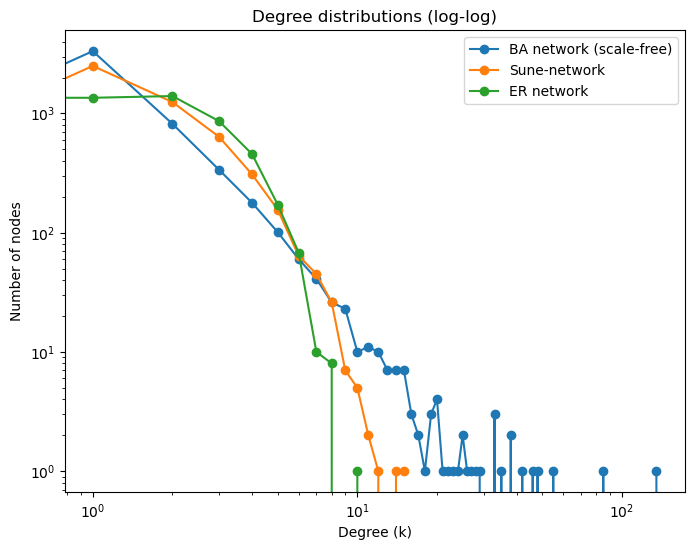

In [42]:
# Degree sequences
deg_ba = [G.degree(n) for n in G.nodes()]       # F-BA network from earlier
deg_sune = [G_sune.degree(n) for n in G_sune.nodes()]
deg_er = [G_er.degree(n) for n in G_er.nodes()]

# Plot degree distributions on log-log scale
plt.figure(figsize=(8, 6))

# BA histogram
hist_ba, bins_ba = np.histogram(deg_ba, bins=range(max(deg_ba)+2))
plt.loglog(bins_ba[:-1], hist_ba, 'o-', label="BA network (scale-free)")

# Sune histogram
hist_sune, bins_sune = np.histogram(deg_sune, bins=range(max(deg_sune)+2))
plt.loglog(bins_sune[:-1], hist_sune, 'o-', label="Sune-network")

# ER histogram
hist_er, bins_er = np.histogram(deg_er, bins=range(max(deg_er)+2))
plt.loglog(bins_er[:-1], hist_er, 'o-', label="ER network")

plt.xlabel("Degree (k)")
plt.ylabel("Number of nodes")
plt.title("Degree distributions (log-log)")
plt.legend()
plt.show()


The comparison of BA, Sune, and ER networks highlights how different generative mechanisms produce fundamentally different structures, even when the number of nodes and edges is similar. The BA network exhibits a heavy-tailed power-law degree distribution, with a few hubs holding extremely high degree, reflecting the outcome of preferential attachment. The Sune-network, while also grown over time, connects nodes uniformly at random and therefore lacks hubs, producing a narrow distribution that decays quickly. The ER network is even more homogeneous, with degrees clustered tightly around the mean and many disconnected components. Taken together, these results demonstrate that preferential attachment is the key ingredient for scale-free networks, distinguishing the BA model from both the uniform-growth Sune-network and the purely random ER model.